In [6]:
from keras.models import load_model
from keras.preprocessing import image

import numpy as np

In [2]:
model = load_model('cats_and_dogs_small_2.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [87]:
img_path = 'cat4.jpg'

In [88]:
img = image.load_img(img_path, target_size=(150,150))

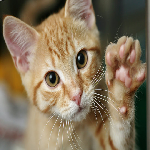

In [89]:
img

In [90]:
img_tensor = image.img_to_array(img)

In [91]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [92]:
img_tensor.shape

(1, 150, 150, 3)

In [93]:
img_tensor /= 255

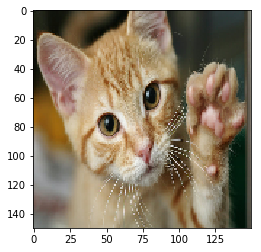

In [94]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [14]:
from keras import models

In [17]:
model.layers

In [18]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [19]:
layer_outputs

[<tf.Tensor 'conv2d_7/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_8/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [20]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [22]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
__________

In [95]:
activations = activation_model.predict(img_tensor)

In [96]:
first_layer_activation = activations[0]

In [97]:
first_layer_activation.shape

(1, 148, 148, 32)

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

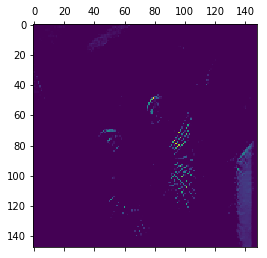

In [103]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

layer_names = []                                                          
for layer in model.layers[:8]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                             

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                       
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualizing convnet filters

In [105]:
from keras.applications import VGG16
from keras import backend as K

In [106]:
model = VGG16(weights='imagenet', include_top=False)

In [109]:
layer_name = 'block3_conv1'

In [110]:
filter_index = 0

In [111]:
layer_output = model.get_layer(layer_name).output

In [113]:
loss = K.mean(layer_output[:,:,:,filter_index])

In [115]:
grads = K.gradients(loss, model.input)[0]

<tf.Tensor 'gradients_1/block1_conv1/convolution_grad/Conv2DBackpropInput:0' shape=(?, ?, ?, 3) dtype=float32>

### Visualizing heatmaps of class activation

In [117]:
from keras.applications import VGG16

In [118]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 79s 0us/step


In [119]:
from keras.preprocessing import image

In [120]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [121]:
import numpy as np

In [180]:
!ls

Visualization.ipynb
boston_housing_regression.ipynb
cat2.jpg
cat3.jpg
cat4.jpg
cat_sample.jpg
cats_and_dogs_small_1.h5
cats_and_dogs_small_2.h5
cats_dogs_convnet.ipynb
elephant.jpg
imdb_binary_classification.ipynb
imdb_binary_classification_convnet.ipynb
mnist_digits_classification.ipynb
reuters_multiclass_classification.ipynb


In [181]:
img_path = "elephant.jpg"

In [182]:
img = image.load_img(img_path, target_size=(224, 224))

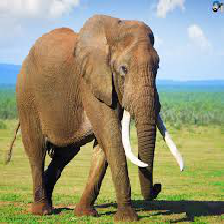

In [183]:
img

In [184]:
x = image.img_to_array(img)

In [185]:
x = np.expand_dims(x, axis=0)

In [186]:
x = preprocess_input(x)

In [187]:
x.shape

(1, 224, 224, 3)

In [188]:
preds = model.predict(x)

In [189]:
decode_predictions(preds, top=3)

[[('n01871265', 'tusker', 0.54576635),
  ('n02504458', 'African_elephant', 0.37032792),
  ('n02504013', 'Indian_elephant', 0.08389721)]]

In [190]:
np.argmax(preds[0])

101

In [191]:
cat_output = model.output[:,101]

In [192]:
last_conv_layer = model.get_layer('block5_conv3')

In [193]:
grads = K.gradients(cat_output, last_conv_layer.output)[0]

In [194]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))                              

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])           

pooled_grads_value, conv_layer_output_value = iterate([x])               

for i in range(512):                                                     
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]            

heatmap = np.mean(conv_layer_output_value, axis=-1)  

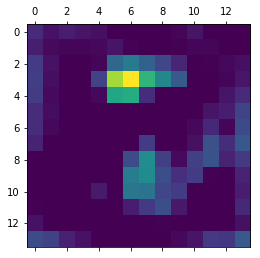

In [195]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [149]:
import cv2

img = cv2.imread(img_path)                                                

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))               

heatmap = np.uint8(255 * heatmap)                                         

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)                   

superimposed_img = heatmap * 0.4 + img                                   

cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)


ModuleNotFoundError: No module named 'cv2'